**Project Title: Data Cleaning – NYC Airbnb Dataset**


**Objective:** Clean and prepare Airbnb listing data for reliable analysis and insights.

Step 1: Import Libraries & Load Dataset

Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

Step 2: Explore the Dataset

Understand the structure and content of the dataset.

In [ ]:
df = pd.read_csv("/content/AB_NYC_2019.csv")

In [ ]:
# diplay the first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,0.00,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


Step 2: Explore Dataset Structure

Check shape, columns, and data types

In [ ]:
print("Shape of Dataset: ", df.shape)

Shape of Dataset:  (22030, 16)


In [ ]:
print("Column name:")
df.columns

Column name:


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
print("Data types:")
print(df.dtypes)


Data types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object


In [ ]:
print("Data information:")
df.info()

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22059 entries, 0 to 22058
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22059 non-null  int64  
 1   name                            22044 non-null  object 
 2   host_id                         22059 non-null  int64  
 3   host_name                       22045 non-null  object 
 4   neighbourhood_group             22059 non-null  object 
 5   neighbourhood                   22059 non-null  object 
 6   latitude                        22059 non-null  float64
 7   longitude                       22059 non-null  float64
 8   room_type                       22058 non-null  object 
 9   price                           22058 non-null  float64
 10  minimum_nights                  22058 non-null  float64
 11  number_of_reviews               22058 non-null  float64
 12  last_review   

Step 3: Check for Missing Values

Identify missing data

In [ ]:
df.isnull().sum()

,0
id,0
name,15
host_id,0
host_name,14
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,1
price,1


Visualize missing values

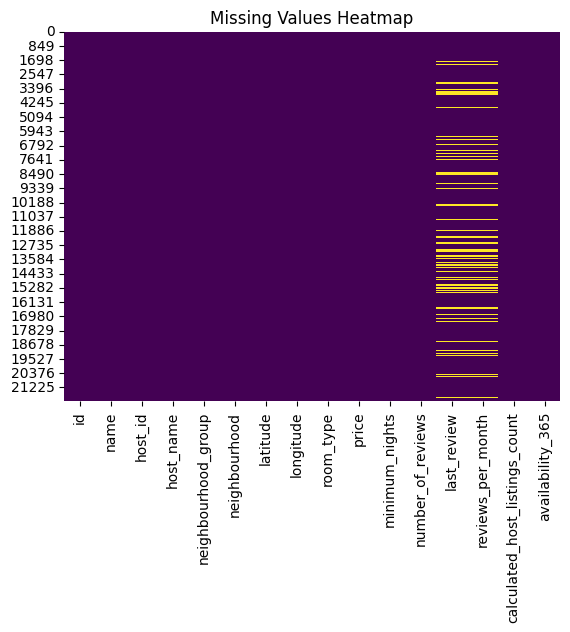

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Step 4: Handle Missing Data

Fill or drop missing values

Fill missing 'reviews_per_month' with 0

In [ ]:
df['reviews_per_month'].fillna(0, inplace=True)

/tmp/ipython-input-1792330394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


Drop rows with missing 'name' or 'host_name'

In [ ]:
df.dropna(subset=['name', 'host_name'], inplace=True)

Confirm missing values handled

In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,1
price,1


Step 5: Remove Duplicates

Check and drop duplicate rows

In [ ]:
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


Step 6: Standardize Column Formats

Clean column names and formats

Clean column names

In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

Convert 'last_review' to datetime

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])

Preview cleaned data

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,0.00,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


Step 7: Detect and Handle Outliers

Use IQR method to detect price outliers

Boxplot before removing outliers

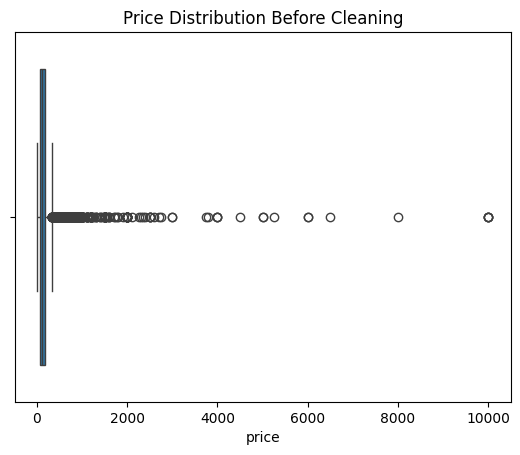

In [ ]:
sns.boxplot(x=df['price'])
plt.title("Price Distribution Before Cleaning")
plt.show()

Remove price outliers using IQR

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Boxplot after removing outliers

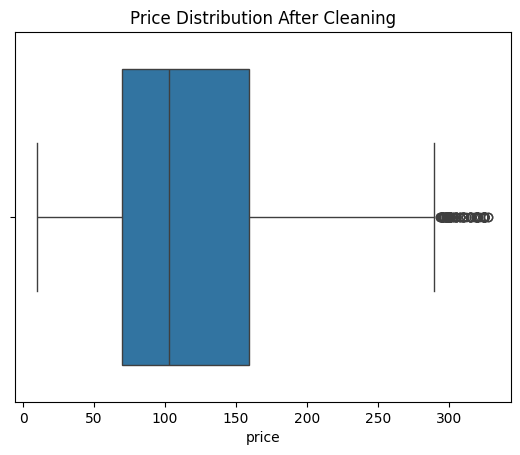

In [ ]:
sns.boxplot(x=df['price'])
plt.title("Price Distribution After Cleaning")
plt.show()

 Step 8: Final Cleaned Dataset Summary

 Show final shape and sample

In [ ]:
print("Final dataset shape:", df.shape)

Final dataset shape: (20840, 16)


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,2.084000e+04,2.084000e+04,20840.000000,20840.000000,20840.000000,20840.000000,20840.000000,17505,20840.000000,20840.000000,20840.000000
mean,8.546204e+06,2.446877e+07,40.729259,-73.955855,121.595250,7.296545,36.582821,2018-04-15 02:24:27.146529280,0.804811,3.641699,101.109885
min,2.539000e+03,2.571000e+03,40.499790,-74.242850,10.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,4.068127e+06,3.991388e+06,40.689208,-73.982390,70.000000,1.000000,1.000000,2017-01-04 00:00:00,0.040000,1.000000,0.000000
50%,8.570758e+06,1.440816e+07,40.722495,-73.956890,103.000000,3.000000,9.000000,2019-01-02 00:00:00,0.230000,1.000000,8.000000
75%,1.327699e+07,3.657436e+07,40.764250,-73.940810,159.000000,5.000000,46.000000,2019-06-17 00:00:00,1.050000,2.000000,215.000000
max,1.774927e+07,1.210969e+08,40.908040,-73.712990,328.000000,1250.000000,629.000000,2019-07-08 00:00:00,16.220000,121.000000,365.000000
std,5.251622e+06,2.705135e+07,0.053671,0.039268,65.076179,22.660317,59.619059,NaN,1.252993,12.561227,131.081766


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,0.00,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


**Final Summary**

This project focused on cleaning the NYC Airbnb dataset to ensure reliable analysis.

Key cleaning steps included:
- Handling missing values in `reviews_per_month`, `name`, and `host_name`
- Removing duplicate rows
- Standardizing column names and formats
- Converting `last_review` to datetime
- Detecting and removing outliers in `price`

Clean data improves accuracy, consistency, and trustworthiness — essential for any data-driven decision-making.